<a href="https://colab.research.google.com/github/waghvaishnav/Machine-Learning-Algorithms-and-Data-Processing-Playground-hub/blob/main/Naive_Bayes%2C_(KNN)%2C_Decision_Tree_Global_Pollution_Analysis_and_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#* project title and description :
The goal is to classify countries into different pollution severity categories (Low, Medium, High) based on pollution levels, energy consumption, and other environmental factors and to identify counts of the severity categories and the most polluted countries.

End-to-end ML workflow

Data preprocessing: handling missing values, encoding categorical variables.

Feature engineering: energy per capita, pollution trends.

Feature scaling.

Classification models: Decision Tree,K Nearest Neighbours,Naive Bayes .

Model evaluation: accuracy, precision, recall, confusion matrix.

Skills demonstrated

Python (pandas, scikit-learn, matplotlib/seaborn).

Data analysis & visualization.

Machine learning model building.

Critical thinking (why one model works better).



#* Data set used for the project :
for download dataset click on the following link, Global_Pollution_Analysis ⏬

https://drive.google.com/file/d/1AEMcCWzJ24fc26Q761SEOa1sOsZiJBC5/view?usp=sharing



#Data Import and Cleaning :

In [ ]:
from google.colab import files
files.upload()


Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis (1).csv


{'Global_Pollution_Analysis (1).csv': b"Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)\nHungary,2005,272.7,124.27,51.95,94802.83,158.14,5.3,41.11,37078.88,12.56,42.22,20972.96\nSingapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.2,5.23,137.25,34850.41\nRomania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15\nCook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.8,21837.51\nDjibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.0,39235.12,12.84,186.52,41379.37\nCroatia,2009,151.36,61.07,86.75,58079.8,136.26,33.39,39.49,12191.7,18.14,103.43,35092.93\nCongo,2008,292.31,156.85,36.4,67774.76,199.71,35.29,26.17,9450.05,16.5,182.09,52050.07\nCentral African Republic,2006,20

In [ ]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,precision_score,recall_score


import pandas as pd
df = pd.read_csv("Global_Pollution_Analysis.csv")
df

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,2004,115.84,78.75,42.34,49503.35,81.23,4.85,17.38,4065.66,6.28,92.96,14818.18
196,Bangladesh,2002,121.82,120.97,63.95,74694.68,25.89,46.22,16.56,36905.26,15.18,114.02,59238.04
197,Korea,2011,149.73,146.92,37.04,2818.85,293.27,38.46,38.36,24700.29,14.11,183.06,28895.94
198,Vanuatu,2002,237.20,113.63,101.96,68746.82,305.61,28.82,32.17,1443.62,12.44,40.65,17068.01


In [ ]:
print("information of the data :")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [ ]:
print("statistical info of the data :")
df.describe()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


In [ ]:
print("null values information of the data :")
df.isnull().sum()

,0
Country,0
Year,0
Air_Pollution_Index,0
Water_Pollution_Index,0
Soil_Pollution_Index,0
Industrial_Waste (in tons),0
Energy_Recovered (in GWh),0
CO2_Emissions (in MT),0
Renewable_Energy (%),0
Plastic_Waste_Produced (in tons),0


In [ ]:
df["Yearly_Pollution_Trend"] = df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]].mean(axis=1)

In [ ]:
def severty(value):
  if value < 45:
    return "low"
  elif 45 <= value < 85:
    return "medium"
  else :
    return "high"

df["Severty"] = df["Yearly_Pollution_Trend"].apply(severty)


In [ ]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("scaling data :")
print(df.head())

scaling data :
        Country      Year  Air_Pollution_Index  Water_Pollution_Index  \
0       Hungary  0.263158             0.898042               0.553778   
1     Singapore  0.052632             0.147062               0.173673   
2       Romania  0.842105             0.166727               0.310542   
3  Cook Islands  0.947368             0.929982               0.214222   
4      Djibouti  0.421053             0.520331               0.573161   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0              0.295481                    0.949995   
1              0.768178                    0.559811   
2              0.800768                    0.559529   
3              0.596973                    0.748028   
4              0.799537                    0.768261   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                   0.299867               0.070756              0.810198   
1                   0.996027               0.092527          

In [ ]:
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
df['Year_encoded'] = le.fit_transform(df['Year'])
df["Severty_encoded"] = le.fit_transform(df['Severty'])         # 0 high , 2 medium ,1 low .

In [ ]:
mapping_labels = {"low":0,"medium":1,"high":2}
df["Severty_encoded"] = df['Severty'].map(mapping_labels)

In [ ]:
df

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Yearly_Pollution_Trend,Severty,Country_encoded,Year_encoded,Severty_encoded
0,Hungary,0.263158,0.898042,0.553778,0.295481,0.949995,0.299867,0.070756,0.810198,0.740954,0.618509,0.203053,0.289991,0.741182,high,77,5,2
1,Singapore,0.052632,0.147062,0.173673,0.768178,0.559811,0.996027,0.092527,0.705301,0.660833,0.241645,0.686667,0.494539,0.315224,high,147,1,2
2,Romania,0.842105,0.166727,0.310542,0.800768,0.559529,0.978556,1.000000,0.097484,0.370326,0.648843,0.621628,0.832411,0.389946,high,136,16,2
3,Cook Islands,0.947368,0.929982,0.214222,0.596973,0.748028,0.273323,0.146326,0.312893,0.175207,0.012853,0.333232,0.302734,0.723718,high,38,18,2
4,Djibouti,0.421053,0.520331,0.573161,0.799537,0.768261,0.058679,0.272347,0.650494,0.784683,0.632905,0.937405,0.590773,0.693474,high,46,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Latvia,0.210526,0.264648,0.283132,0.225884,0.491126,0.142345,0.061336,0.277179,0.071441,0.295630,0.461272,0.199272,0.252128,medium,92,4,1
196,Bangladesh,0.105263,0.288795,0.534158,0.382387,0.746306,0.029002,0.927360,0.258760,0.737433,0.753213,0.568448,0.854003,0.413177,high,13,2,2
197,Korea,0.578947,0.401494,0.688448,0.187500,0.018228,0.576631,0.764915,0.748428,0.489914,0.698201,0.919796,0.406772,0.475350,high,88,11,2
198,Vanuatu,0.105263,0.754694,0.490517,0.657662,0.686056,0.601905,0.563115,0.609389,0.018266,0.612339,0.195064,0.232433,0.750110,high,170,2,2


In [ ]:
X = df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index","CO2_Emissions (in MT)","Industrial_Waste (in tons)","Energy_Consumption_Per_Capita (in MWh)"]]
Y = df[["Severty_encoded"]]

🔹Naive Bayes Theorem :

confusion matrix : [[ 0  7]
 [ 0 33]] 

classification report :               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.82      1.00      0.90        33

    accuracy                           0.82        40
   macro avg       0.41      0.50      0.45        40
weighted avg       0.68      0.82      0.75        40

Accuracy score of the Naive model : 82.5
the F1 score is : 0.4520547945205479


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning

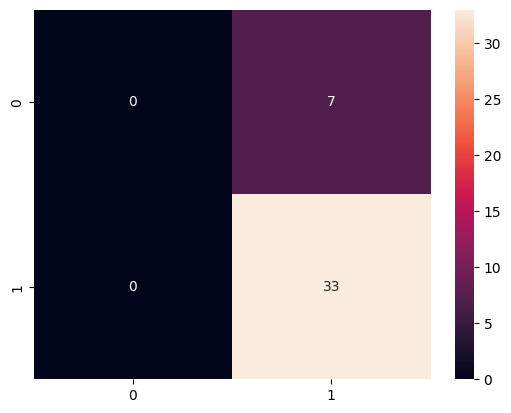

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

MNB =MultinomialNB()
MNB.fit(x_train,y_train)

y_prediction = MNB.predict(x_test)

conf_matrix =confusion_matrix(y_test,y_prediction)
print("confusion matrix :",conf_matrix,"\n")
sns.heatmap(conf_matrix,annot=True)

print("classification report :",classification_report(y_test,y_prediction))
print("Accuracy score of the Naive model :",accuracy_score(y_test,y_prediction)*100)
print("the F1 score is :",f1_score(y_test,y_prediction,average="macro"))

🔹K Nearest Neighbours (KNN): / (Hyperparameter Tunning)

In [ ]:
param_for_grid ={ "n_neighbors":[3,4,5,2]}

grid_knn  = GridSearchCV(KNeighborsClassifier(),param_for_grid)

grid_knn.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 2]})

In [ ]:
print("best_params_ ",grid_knn.best_params_)
print("best_score_ ",grid_knn.best_score_*100)
print("best_estimator_ ",grid_knn.best_estimator_)

best_KNC = grid_knn.best_estimator_
best_KNC.fit(x_train,y_train)

knn_prediction = best_KNC.predict(x_test)

best_params_  {'n_neighbors': 2}
best_score_  96.25
best_estimator_  KNeighborsClassifier(n_neighbors=2)


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of the KNN model is :  85.0
Confusion Matrix : [[ 3  4]
 [ 2 31]]
the F1 score for the model is : 0.7058823529411764
the classification report :                precision    recall  f1-score   support

           1       0.60      0.43      0.50         7
           2       0.89      0.94      0.91        33

    accuracy                           0.85        40
   macro avg       0.74      0.68      0.71        40
weighted avg       0.84      0.85      0.84        40

the RECALL score of the modek is : 0.683982683982684


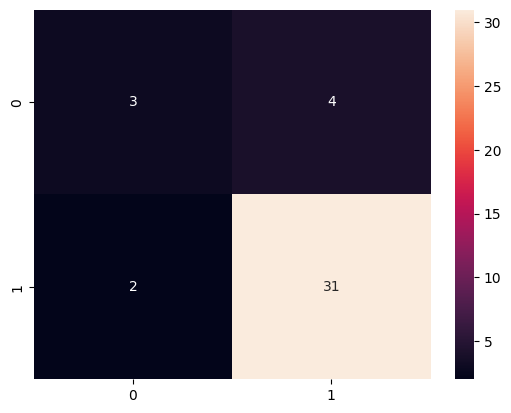

In [ ]:
print("Accuracy of the KNN model is : ",accuracy_score(y_test,knn_prediction)*100)
cm = confusion_matrix(y_test,knn_prediction)
print("Confusion Matrix :",cm)
sns.heatmap(cm,annot=True)
print("the F1 score for the model is :",f1_score(y_test,knn_prediction,average="macro"))
print("the classification report : ",classification_report(y_test,knn_prediction))
print("the RECALL score of the modek is :",recall_score(y_test,knn_prediction,average="macro"))

🔹Decision Tree Algorithm :

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20]
}

grid_dst = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring="accuracy",return_train_score=True)

grid_dst.fit(x_train,y_train)

print("best parameters for the decision tree is : ",grid_dst.best_params_)
print("best_score for the decision tree is : ",grid_dst.best_score_*100)
print("best_estimator for the decision tree is : ",grid_dst.best_estimator_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


best parameters for the decision tree is :  {'max_depth': 3, 'min_samples_split': 5}
best_score for the decision tree is :  94.375
best_estimator for the decision tree is :  DecisionTreeClassifier(max_depth=3, min_samples_split=5)


Accuracy of the decision tree model :  80.0
Confusion Matrix : [[ 0  0  0]
 [ 1  0  6]
 [ 0  1 32]]
the F1 score for the model is : 0.3004694835680751
the classification report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         7
           2       0.84      0.97      0.90        33

    accuracy                           0.80        40
   macro avg       0.28      0.32      0.30        40
weighted avg       0.69      0.80      0.74        40

the RECALL score of the modek is : 0.32323232323232326


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

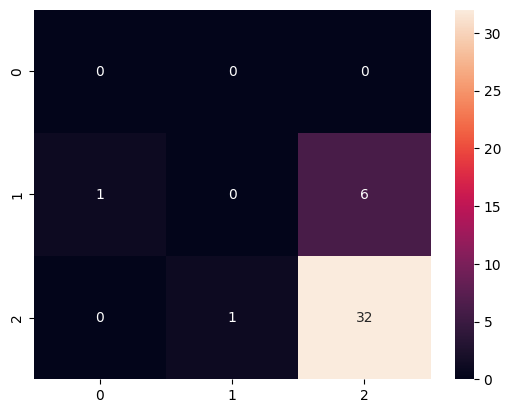

In [ ]:
best_dst = grid_dst.best_estimator_

best_dst.fit(x_train,y_train)

tree_prediction = best_dst.predict(x_test)

print("Accuracy of the decision tree model : ",accuracy_score(y_test,tree_prediction)*100)
cm1 = confusion_matrix(y_test,tree_prediction)
print("Confusion Matrix :",cm1)
sns.heatmap(cm1,annot=True)
print("the F1 score for the model is :",f1_score(y_test,tree_prediction,average="macro"))
print("the classification report : ",classification_report(y_test,tree_prediction))
print("the RECALL score of the modek is :",recall_score(y_test,tree_prediction,average="macro"))

Proportion of the low medium high value count according to levels of polluted countries :

In [ ]:
print("the total proportion of the high,low and medium pollution countries :")
df["Severty"].value_counts()

the total proportion of the high,low and medium pollution countries :


,count
Severty,
high,179
medium,20
low,1


Making the new prediction based on the naive bayes ,k nearest neighbors and the decision tree :

In [ ]:
df.groupby("Country")[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]].mean().sort_values("Air_Pollution_Index", ascending=False).head(10)



,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index
Country,,,
Equatorial Guinea,1.000000,0.485166,0.230953
Saint Barthelemy,0.996689,0.841310,0.580823
French Southern Territories,0.983687,0.247637,0.620003
Congo,0.977226,0.747488,0.182865
United States Minor Outlying Islands,0.971452,0.073250,0.566266
Morocco,0.957036,0.348178,0.974797
Ukraine,0.955017,0.237945,0.646654
Guinea-Bissau,0.946134,0.864380,0.389557
Colombia,0.945407,0.517034,0.368265


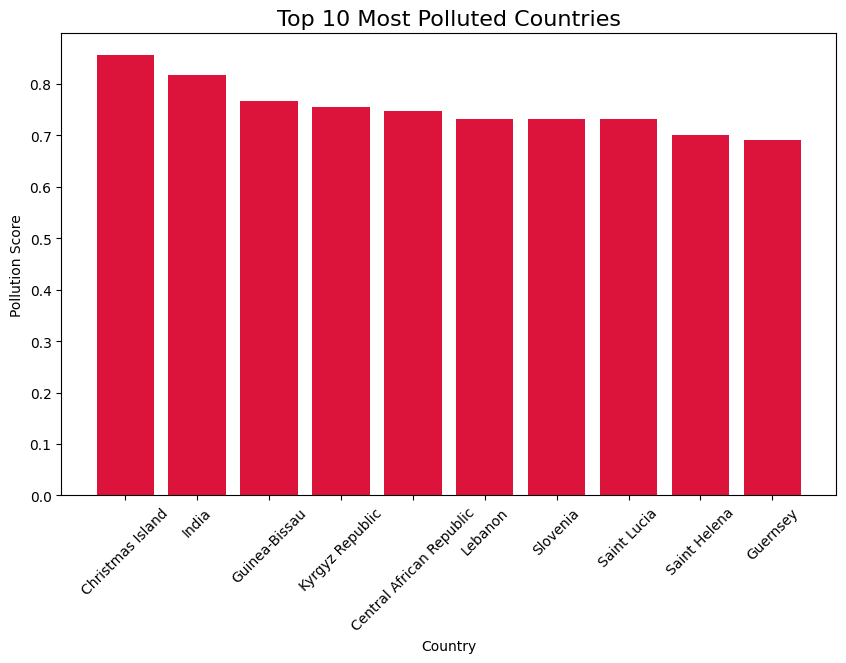

In [ ]:
df["Pollution_Score"] = (
    df["Air_Pollution_Index"] +
    df["Water_Pollution_Index"] +
    df["Soil_Pollution_Index"] +
    df["CO2_Emissions (in MT)"] +
    df["Industrial_Waste (in tons)"]
) / 5
high_polu_country =df.groupby("Country")["Severty"].mean().reset_index()

most_polluted = high_polu_country.sort_values(by="Pollution_Score", ascending=False)

top10 = most_polluted.head(10)

plt.figure(figsize=(10,6))
plt.bar(top10["Country"], top10["Pollution_Score"], color="crimson")
plt.title("Top 10 Most Polluted Countries", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Pollution Score")
plt.xticks(rotation=45)
plt.show()


Accuracy Comparison :

In [ ]:
# checking Accuracy of the each model

print("Accuracy score of the Naive model :",accuracy_score(y_test,y_prediction)*100)
print("Accuracy of the KNN model is : ",accuracy_score(y_test,knn_prediction)*100)
print("Accuracy of the decision tree model : ",accuracy_score(y_test,tree_prediction)*100)


Accuracy score of the Naive model : 82.5
Accuracy of the KNN model is :  85.0
Accuracy of the decision tree model :  80.0
